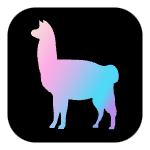

**What is LlamaIndex?**



LlamaIndex is a library designed to help in creating structured data from unstructured text using LLMs (Large Language Models) such as OpenAI's GPT models. It facilitates organizing raw text data into a format that is more usable and meaningful for downstream applications.



It simplifies the process of extracting useful information from complex, unstructured sources like documents, chats, logs, or other long-form text. By structuring the data, it becomes easier to analyze, query, and manipulate.





**Key Concepts of LlamaIndex**

1. **Data Extraction:** LlamaIndex extracts and structures data from long-form, unstructured texts (like conversations, articles, or logs) by processing these texts through predefined templates or models. This structured output can then be used for deeper analysis, machine learning, or further decision-making.

2. **Programmatic Extractors**: LlamaIndex offers several extractors that allow you to define specific formats for the output data. These extractors map unstructured data into structured formats (e.g., lists, dictionaries) based on custom schemas or Pydantic models.

3. **Pydantic Models**: Pydantic is a Python library for data validation and settings management, which can be used to define the expected structure of the data. LlamaIndex leverages Pydantic to enforce type checking and validate structured data.

4.** LlamaIndex and LLM Integration**: LlamaIndex works seamlessly with LLMs like OpenAI’s GPT-4 to process text data. The LLM is used for interpreting the text and recognizing entities, relationships, and structures within the data.

**Installation**

To get started


Install LlamaIndex and OpenAi to get the LLM

In [ ]:
pip install llama-index-core llama-index-llms-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.8 MB/s eta 0:00:00


Install pydantic for defining the structure of our data models



In [ ]:
pip install pydantic

Lets Define out pydantic model

In [ ]:
from pydantic import BaseModel, Field
from datetime import date
from typing import Optional

class Education(BaseModel):
    """Represents an individual's education history."""
    school: str = Field(description="The name of the school or university attended.")
    startDate: str = Field(description="The start date of the educational program.")
    endDate: str = Field(description="The end date of the educational program.")
    degree: str = Field(description="The degree or certification earned during the program.")

class Experience(BaseModel):
    """Represents an individual's work experience."""
    title: str = Field(description="The job title held during the work experience.")
    company: str = Field(description="The company or organization where the work was performed.")
    startDate: str = Field(description="The start date of the work experience.")
    endDate: str = Field(description="The end date of the work experience.")
    duration: str = Field(description="The current duration of the work experience")

class ResumeData(BaseModel):
    """Represents the data in an individual's resume or CV."""
    name: str = Field(description="The name of the individual.")
    email: str = Field(description="The email address of the individual.")
    phone_number: str = Field(description="The phone number of the individual.")
    address: str = Field(description="The physical address of the individual.")
    about: str = Field(description="A brief introduction or summary about the individual.")
    education: list[Education] = Field(description="A list of the individual's education history.")
    experience: list[Experience] = Field(description="A list of the individual's work experience.")
    blood_type: Optional[str] = Field(description="The blood type of the individual.")
    # blood_type: Optional[str] = Field(default="N/A", description="The blood type of the individual.")


Lets load our resume from a pdf

In [ ]:
from llama_index.core import download_loader

PDFReader = download_loader("PDFReader")
reader = PDFReader()

documents = reader.load_data("sample-resume.pdf")
resume_text = documents[0].text  # Extract text

print(resume_text)


<ipython-input-48-5d54611858ea>:3: DeprecationWarning: Call to deprecated function (or staticmethod) download_loader. (`download_loader()` is deprecated. Please install tool using pip install directly instead.)
  PDFReader = download_loader("PDFReader")


CRISTEL VILLARIN - REYES
A staff with 8+ years of experience in a
corporate setting. Proficient in report
preparation, data management and
presenter. Skilled in coordination,
communication and teamwork,
dedicated to achieving team’s goal,
leading to the organization’s success.
WORK EXPERIENCE
Master Data Custodian - Supervisor
Bounty Plus Inc.
November 2022-Present
Responsible for material enrolment and configuration in
the systems.
Handles Procurement Module and assist in Inventory
Module.
Facilitate meetings and trainings to end-users for
implementation and new updates related to systems.
Performs administrative task especially coordination
within the team and other department inside Bounty
Fresh Group of Companies.
Finance Administrative Assistant
Bounty Agro Ventures Inc.
September 2016 - November 2022
Executive Assistant of AVP of Finance focuses on
coordination, consolidating data, and report preparation.
Accounting Clerk
Pilipinas Kyoritsu Inc.
August 2015 - June 2016
A project-

In [ ]:
pip install openai

In [ ]:
import openai
import os
from google.colab import userdata

# Set your OpenAI API key
openai.api_key = userdata.get('mj_open_api_key')


Lets initialize our model

In [ ]:
from llama_index.llms.openai import OpenAI
import json

llm = OpenAI(model="gpt-4o-mini")

sllm = llm.as_structured_llm(ResumeData)

llmResponse = sllm.complete(resume_text)
# json_response = json.loads(llmResponse.text)
# print(json.dumps(json_response, indent=2))

json_response = llmResponse.model_dump()  # Use Pydantic's model_dump() to get a dict

# Print the formatted JSON
print(json.dumps(json_response, indent=2))

{
  "text": "{\"name\":\"CRISTEL VILLARIN - REYES\",\"email\":\"villarincristel@gmail.com\",\"phone_number\":\"0929-959-2303\",\"address\":\"Block 8 Lot 28 Romanville Subd. Brgy. Tagapo Sta. Rosa Laguna\",\"about\":\"A staff with 8+ years of experience in a corporate setting. Proficient in report preparation, data management and presenter. Skilled in coordination, communication and teamwork, dedicated to achieving team\u2019s goal, leading to the organization\u2019s success.\",\"education\":[{\"school\":\"STI College - Balayan\",\"startDate\":\"2010-06-01\",\"endDate\":\"2014-04-01\",\"degree\":\"BS Business Administration Major in Operations Management\"},{\"school\":\"San Piro National Highschool\",\"startDate\":\"2006-06-01\",\"endDate\":\"2010-04-01\",\"degree\":\"Secondary Education\"},{\"school\":\"Baha Elementary School\",\"startDate\":\"2001-06-01\",\"endDate\":\"2006-04-01\",\"degree\":\"Primary Education\"}],\"experience\":[{\"title\":\"Master Data Custodian - Supervisor\",\"

**Structured Prediction**

Structured Prediction allows you to extract and organize data from unstructured text (like PDFs or plain text) into a structured format. In this case, the structured format is a Pydantic class (which defines the data structure), and the extraction is handled through LLMs (Large Language Models) like OpenAI.


Key Concepts:
1. **Pydantic Class**: Pydantic is used to define the data structure you want your LLM to return. For example, an invoice might have fields like invoice_id, date, and line_items. You create a Pydantic class that matches this structure.

2. **Prompt Template**: This is the instruction given to the LLM on how to extract and structure the data. In the example, the prompt asks the LLM to extract an invoice from a given text and, if no invoice ID is found, to use the company name and date.

3. **structured_predict**: This method allows you to call the LLM and pass both the Pydantic class (the structure you want) and the PromptTemplate (the extraction instructions). You can also include extra parameters (e.g., company_name="Uber") to guide the model in generating more specific data.

In [ ]:
from llama_index.core.prompts import PromptTemplate
import json




prompt = PromptTemplate(
    """
    Given the following resume text, Identify the latest work experience of the user.
    todays date is February 8, 2025.
    Resume Text:\n{text}
    """
)
# if endDate have Present as value then set that to todays date February 8, 2025.
# For the title add a prefix of `Awesome Job:`

try:
    resume_data_response = llm.structured_predict(
        Experience, prompt, text=resume_text
    )

    print(json.dumps(resume_data_response.model_dump(), indent=1))

except Exception as e:
    print(f"Error extracting latest experience: {e}")



{
 "title": "Master Data Custodian - Supervisor",
 "company": "Bounty Plus Inc.",
 "startDate": "November 2022",
 "endDate": "Present",
 "duration": "2 years and 3 months"
}


As you can see, this allows us to include additional prompt direction for what the LLM should do if Pydantic isn’t quite enough to parse the data correctly.  The response object in this case is the Pydantic object itself. We can get the output as JSON if we want: